In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

# decision tree
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

data = pd.read_csv("/content/sample_data/BRCA.csv") #dataset
print(data.shape)
print(data.head())

(341, 16)
     Patient_ID   Age  Gender  Protein1  Protein2  Protein3  Protein4  \
0  TCGA-D8-A1XD  36.0  FEMALE  0.080353   0.42638   0.54715  0.273680   
1  TCGA-EW-A1OX  43.0  FEMALE -0.420320   0.57807   0.61447 -0.031505   
2  TCGA-A8-A079  69.0  FEMALE  0.213980   1.31140  -0.32747 -0.234260   
3  TCGA-D8-A1XR  56.0  FEMALE  0.345090  -0.21147  -0.19304  0.124270   
4  TCGA-BH-A0BF  56.0  FEMALE  0.221550   1.90680   0.52045 -0.311990   

  Tumour_Stage                      Histology ER status PR status HER2 status  \
0          III  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   
1           II             Mucinous Carcinoma  Positive  Positive    Negative   
2          III  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   
3           II  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   
4           II  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   

                  Surgery_type Date_of_Surgery Date_of_Last_Visi

In [ ]:
print(data.isnull().sum())
# data.info()

Patient_ID             7
Age                    7
Gender                 7
Protein1               7
Protein2               7
Protein3               7
Protein4               7
Tumour_Stage           7
Histology              7
ER status              7
PR status              7
HER2 status            7
Surgery_type           7
Date_of_Surgery        7
Date_of_Last_Visit    24
Patient_Status        20
dtype: int64


In [ ]:
data = data.dropna() #dropping the null values
print(data.shape)
data.to_csv("BRCA_updated1.csv",index=False)

(317, 16)


In [ ]:
print(data.Gender.value_counts())

FEMALE    313
MALE        4
Name: Gender, dtype: int64


In [ ]:
stage = data["Tumour_Stage"].value_counts()
transactions = stage.index
quantity = stage.values

figure = px.pie(data, 
             values=quantity, 
             names=transactions,hole = 0.5, 
             title="Tumour Stages of Patients")
figure.show()

NameError: ignored

In [ ]:
histology = data["Histology"].value_counts()
transactions = histology.index
quantity = histology.values
figure = px.pie(data, 
             values=quantity, 
             names=transactions,hole = 0.5, 
             title="Histology of Patients")
figure.show()

In [ ]:
# ER status
print(data["ER status"].value_counts())
# PR status
print(data["PR status"].value_counts())
# HER2 status
print(data["HER2 status"].value_counts())

Positive    317
Name: ER status, dtype: int64
Positive    317
Name: PR status, dtype: int64
Negative    288
Positive     29
Name: HER2 status, dtype: int64


In [ ]:
surgery = data["Surgery_type"].value_counts()
transactions = surgery.index
quantity = surgery.values
figure = px.pie(data, 
             values=quantity, 
             names=transactions,hole = 0.5, 
             title="Type of Surgery of Patients")
figure.show()

In [ ]:
data["Tumour_Stage"] = data["Tumour_Stage"].map({"I": 1, "II": 2, "III": 3})
data["Histology"] = data["Histology"].map({"Infiltrating Ductal Carcinoma": 1, 
                                           "Infiltrating Lobular Carcinoma": 2, "Mucinous Carcinoma": 3})
data["ER status"] = data["ER status"].map({"Positive": 1})
data["PR status"] = data["PR status"].map({"Positive": 1})
data["HER2 status"] = data["HER2 status"].map({"Positive": 1, "Negative": 2})
data["Gender"] = data["Gender"].map({"MALE": 0, "FEMALE": 1})
data["Surgery_type"] = data["Surgery_type"].map({"Other": 1, "Modified Radical Mastectomy": 2, 
                                                 "Lumpectomy": 3, "Simple Mastectomy": 4})
print(data)
data.to_csv("BRCA_updated2.csv",index=False)

       Patient_ID   Age  Gender  Protein1  Protein2  Protein3  Protein4  \
0    TCGA-D8-A1XD  36.0       1  0.080353   0.42638   0.54715  0.273680   
1    TCGA-EW-A1OX  43.0       1 -0.420320   0.57807   0.61447 -0.031505   
2    TCGA-A8-A079  69.0       1  0.213980   1.31140  -0.32747 -0.234260   
3    TCGA-D8-A1XR  56.0       1  0.345090  -0.21147  -0.19304  0.124270   
4    TCGA-BH-A0BF  56.0       1  0.221550   1.90680   0.52045 -0.311990   
..            ...   ...     ...       ...       ...       ...       ...   
329  TCGA-AN-A04A  36.0       1  0.231800   0.61804  -0.55779 -0.517350   
330  TCGA-A8-A085  44.0       0  0.732720   1.11170  -0.26952 -0.354920   
331  TCGA-A1-A0SG  61.0       1 -0.719470   2.54850  -0.15024  0.339680   
332  TCGA-A2-A0EU  79.0       1  0.479400   2.05590  -0.53136 -0.188480   
333  TCGA-B6-A40B  76.0       1 -0.244270   0.92556  -0.41823 -0.067848   

     Tumour_Stage  Histology  ER status  PR status  HER2 status  Surgery_type  \
0               3 

In [ ]:
# Splitting data
x = np.array(data[['Age', 'Gender', 'Protein1', 'Protein2', 'Protein3','Protein4', 
                   'Tumour_Stage', 'Histology', 'ER status', 'PR status', 
                   'HER2 status', 'Surgery_type']])
y = np.array(data[['Patient_Status']])
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.10, random_state=42)

In [ ]:
# Prediction
# features = [['Age', 'Gender', 'Protein1', 'Protein2', 'Protein3','Protein4', 'Tumour_Stage', 'Histology', 'ER status', 'PR status', 'HER2 status', 'Surgery_type']]
features = np.array([[36.0, 1, 0.080353, 0.42638, 0.54715, 0.273680, 3, 1, 1, 1, 2, 2]])
features1 = np.array([[56.0,       1,  0.221550,   1.90680,   0.52045, -0.311990   , 3  ,  3,     3  ,    3 ,       3   , 3   ]])
features2 = np.array([[76.0,1,-0.244270, 0.92556,-0.41823,-0.067848,1,1,1,1, 2,3]])

In [ ]:
rf = RandomForestClassifier()
rf.fit(xtrain, ytrain)

rf.predict(features)

<ipython-input-46-bad38942a48e>:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



array(['Alive'], dtype=object)

In [ ]:
model = SVC()
model.fit(xtrain, ytrain)
print(model.predict(features1))

['Alive']


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(xtrain,ytrain)

#Predict the response for test dataset
y_pred = clf.predict(features1)
print(y_pred)

['Dead']


In [ ]:
#Model Evaluation 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [ ]:
#accuracy on training data for DecisionTreeClassifier
X_train_prediction = clf.predict(xtrain)
training_data_accuracy = accuracy_score(ytrain,X_train_prediction)
print(training_data_accuracy)
print("Accuracy on training data ",round(training_data_accuracy*100,2),'%')

#precision for training data 
precision_test_1 = precision_score(ytrain,X_train_prediction,average="binary", pos_label='Alive')
print("Precision for training data ",precision_test_1)

#recall for training data 
recall_test_1 = recall_score(ytrain,X_train_prediction,average="binary", pos_label='Alive')
print("Recall for training data ",recall_test_1)

#F1 for training data 
f1_test_1 = f1_score(ytrain,X_train_prediction,average="binary", pos_label='Alive')
print("f1 Score for training data ",f1_test_1)

1.0
Accuracy on training data  100.0 %
Precision for training data  1.0
Recall for training data  1.0
f1 Score for training data  1.0


0.5
Accuracy on testing data  50.0 %
[[14 12]
 [ 4  2]]
14 12 4 2
Precision for testing data  0.7777777777777778
Recall for testing data  0.5384615384615384
f1 Score for testing data  0.6363636363636364


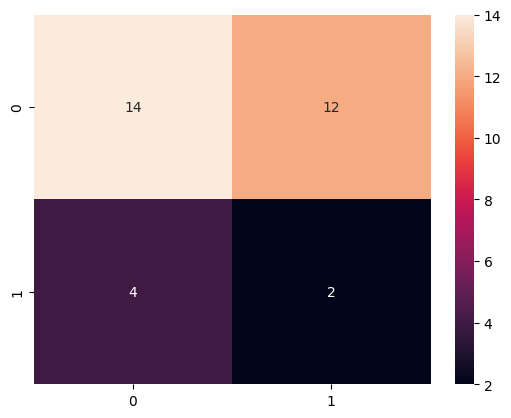

In [ ]:
#accuracy on testing data for DecisionTreeClassifier
X_test_prediction1 = clf.predict(xtest)
testing_data_accuracy1 = accuracy_score(ytest,X_test_prediction1)
print(testing_data_accuracy1)
print("Accuracy on testing data ",round(testing_data_accuracy1*100,2),'%')

#confusion matrix 
cf_matrix = confusion_matrix(ytest,X_test_prediction1)
print(cf_matrix)
tn1,fp1,fn1,tp1 = cf_matrix.ravel()
print(tn1,fp1,fn1,tp1)
sns.heatmap(cf_matrix,annot=True)

#precision for testing data 
precision_test1 = precision_score(ytest,X_test_prediction1,average="binary", pos_label='Alive')
print("Precision for testing data ",precision_test1)

#recall for testing data 
recall_test1 = recall_score(ytest,X_test_prediction1,average="binary", pos_label='Alive')
print("Recall for testing data ",recall_test1)

#F1 for testing data 
f1_test1 = f1_score(ytest,X_test_prediction1,average="binary", pos_label='Alive')
print("f1 Score for testing data ",f1_test1)

In [ ]:
#accuracy on training data for RandomForestClassifier
X_train_prediction2 = rf.predict(xtrain)
training_data_accuracy2 = accuracy_score(ytrain,X_train_prediction2)
print(training_data_accuracy2)
print("Accuracy on training data ",round(training_data_accuracy2*100,2),'%')

#precision for training data 
precision_test_2 = precision_score(ytrain,X_train_prediction2,average="binary", pos_label='Alive')
print("Precision for training data ",precision_test_2)

#recall for training data 
recall_test_2 = recall_score(ytrain,X_train_prediction2,average="binary", pos_label='Alive')
print("Recall for training data ",recall_test_2)

#F1 for training data 
f1_test_2 = f1_score(ytrain,X_train_prediction2,average="binary", pos_label='Alive')
print("f1 Score for training data ",f1_test_2)

1.0
Accuracy on training data  100.0 %
Precision for training data  1.0
Recall for training data  1.0
f1 Score for training data  1.0


0.84375
Accuracy on testing data  84.38 %
[[26  0]
 [ 5  1]]
26 0 5 1
Precision for testing data  0.8387096774193549
Recall for testing data  1.0
f1 Score for testing data  0.9122807017543859


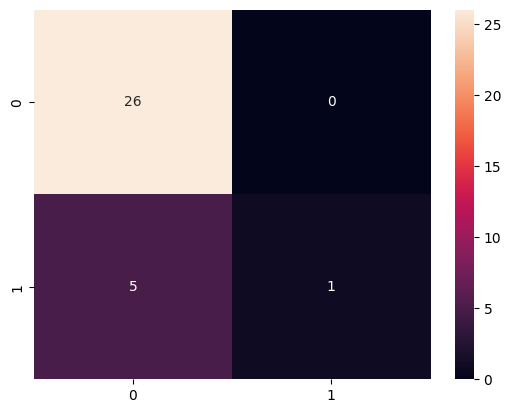

In [ ]:
#accuracy on testing data for RandomForestClassifier
X_test_prediction3 = rf.predict(xtest)
testing_data_accuracy3 = accuracy_score(ytest,X_test_prediction3)
print(testing_data_accuracy3)
print("Accuracy on testing data ",round(testing_data_accuracy3*100,2),'%')

#confusion matrix 
cf_matrix1 = confusion_matrix(ytest,X_test_prediction3)
print(cf_matrix1)
tn2,fp2,fn2,tp2 = cf_matrix1.ravel()
print(tn2,fp2,fn2,tp2)
sns.heatmap(cf_matrix1,annot=True)

#precision for testing data 
precision_test2 = precision_score(ytest,X_test_prediction3,average="binary", pos_label='Alive')
print("Precision for testing data ",precision_test2)

#recall for testing data 
recall_test2 = recall_score(ytest,X_test_prediction3,average="binary", pos_label='Alive')
print("Recall for testing data ",recall_test2)

#F1 for testing data 
f1_test2 = f1_score(ytest,X_test_prediction3,average="binary", pos_label='Alive')
print("f1 Score for testing data ",f1_test2)

In [ ]:
#accuracy on training data for SVC
X_train_prediction3 = model.predict(xtrain)
training_data_accuracy3 = accuracy_score(ytrain,X_train_prediction3)
print(training_data_accuracy3)
print("Accuracy on training data ",round(training_data_accuracy3*100,2),'%')

#precision for training data 
precision_test_3 = precision_score(ytrain,X_train_prediction3,average="binary", pos_label='Alive')
print("Precision for training data ",precision_test_3)

#recall for training data 
recall_test_3 = recall_score(ytrain,X_train_prediction3,average="binary", pos_label='Alive')
print("Recall for training data ",recall_test_3)

#F1 for training data 
f1_test_3 = f1_score(ytrain,X_train_prediction3,average="binary", pos_label='Alive')
print("f1 Score for training data ",f1_test_3)

0.8035087719298246
Accuracy on training data  80.35 %
Precision for training data  0.8035087719298246
Recall for training data  1.0
f1 Score for training data  0.8910505836575876


0.8125
Accuracy on testing data  81.25 %
[[26  0]
 [ 6  0]]
14 12 4 2
Precision for testing data  0.8125
Recall for testing data  1.0
f1 Score for testing data  0.896551724137931


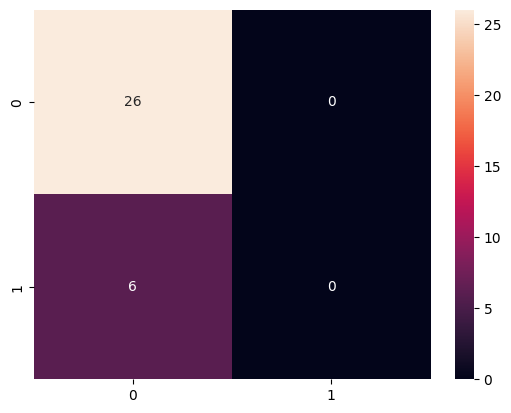

In [ ]:
#accuracy on testing data for SVC
X_test_prediction4 = model.predict(xtest)
testing_data_accuracy4 = accuracy_score(ytest,X_test_prediction4)
print(testing_data_accuracy4)
print("Accuracy on testing data ",round(testing_data_accuracy4*100,2),'%')

#confusion matrix 
cf_matrix2 = confusion_matrix(ytest,X_test_prediction4)
print(cf_matrix2)
tn3,fp3,fn3,tp3 = cf_matrix.ravel()
print(tn3,fp3,fn3,tp3)
sns.heatmap(cf_matrix2,annot=True)

#precision for testing data 
precision_test3 = precision_score(ytest,X_test_prediction4,average="binary", pos_label='Alive')
print("Precision for testing data ",precision_test3)

#recall for testing data 
recall_test3 = recall_score(ytest,X_test_prediction4,average="binary", pos_label='Alive')
print("Recall for testing data ",recall_test3)

#F1 for testing data 
f1_test3 = f1_score(ytest,X_test_prediction4,average="binary", pos_label='Alive')
print("f1 Score for testing data ",f1_test3)